In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.fft as sp
import statistics as st

In [3]:
data = pd.read_csv('covid_19_indonesia_time_series_all.csv', sep=',')
data = data[data['Location'] == 'Jawa Timur']
data = data[(data['New Recovered']) != 0]
data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
109,3/19/2020,ID-JI,Jawa Timur,0,0,1,-1,51,1,13,...,112.732941,-7.723346,0.00,1.26,0.00,0.02,1.96%,25.49%,0.0,1.0
159,3/23/2020,ID-JI,Jawa Timur,0,0,1,-1,51,1,14,...,112.732941,-7.723346,0.00,1.26,0.00,0.02,1.96%,27.45%,1.0,1.0
189,3/25/2020,ID-JI,Jawa Timur,0,2,2,-4,51,4,16,...,112.732941,-7.723346,0.00,1.26,0.05,0.10,7.84%,31.37%,1.0,2.0
205,3/26/2020,ID-JI,Jawa Timur,8,0,2,6,59,4,18,...,112.732941,-7.723346,0.20,1.46,0.00,0.10,6.78%,30.51%,NaN,0.0
361,4/1/2020,ID-JI,Jawa Timur,11,0,5,6,103,10,23,...,112.732941,-7.723346,0.27,2.54,0.00,0.25,9.71%,22.33%,5.5,0.0


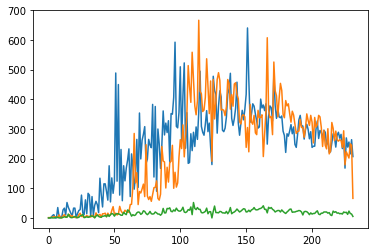

In [4]:
x=data['New Cases'].values
y=data['New Recovered'].values
z=data['New Deaths'].values
plt.plot(x,'-')
plt.plot(y,'-')
plt.plot(z,'-')

plt.show()

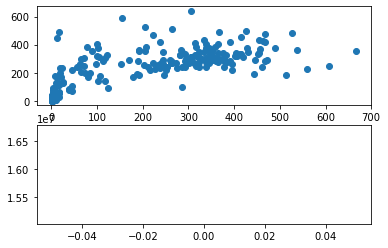

In [5]:
plt.subplot(2,1,1)
plt.plot(y,x,'o')
plt.subplot(2,1,2)
plt.plot(np.correlate(y,x,mode='valid'),'-')
plt.show()

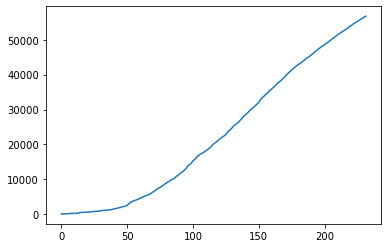

In [6]:
w=data['Total Cases'].values
plt.plot(w,'-')
plt.show()

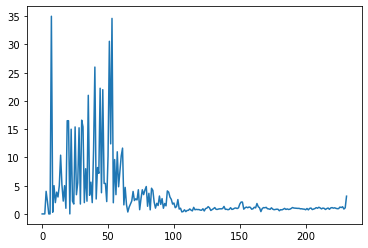

In [7]:
N=data['Population'].values-z
R=(x/y)*(N-z)/(N-z-w)
t=range(len(R))

plt.plot(t,R,'-')
plt.show()

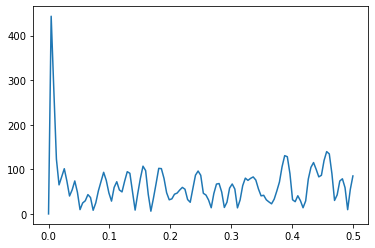

In [8]:
yf = sp.rfft(R-np.mean(R))
xf = sp.rfftfreq(len(R), 1)

plt.plot(xf, np.abs(yf))
plt.show()

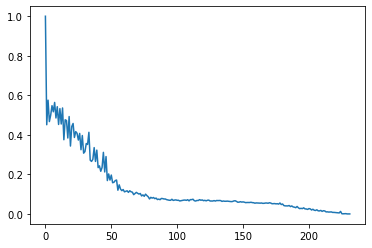

characteristic time :  30.590579764266653  hari


In [11]:
autocorrelation = np.correlate(R, R, mode="full")
autocorrelation = autocorrelation[autocorrelation.size//2:]
normautcor=autocorrelation/np.max(autocorrelation)

plt.plot(normautcor)
plt.show()

print('characteristic time : ',np.sum(normautcor),' hari')

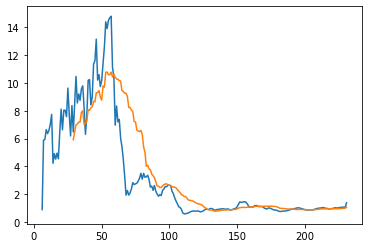

Reproduction Number mingguan saat ini adalah :  1.376469589747316
Reproduction Number bulanan saat ini adalah :  1.0665629535535277


In [10]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

RMA7=moving_average(R, 7)
RMA30=moving_average(R, 30)

t30=range(len(RMA30))+np.full((len(RMA30)), 29)
t7=range(len(RMA7))+np.full((len(RMA7)), 6)

plt.plot(t7,RMA7,'-')
plt.plot(t30,RMA30,'-')

plt.show()

print('Reproduction Number mingguan saat ini adalah : ',RMA7[len(RMA7)-1])
print('Reproduction Number bulanan saat ini adalah : ',RMA30[len(RMA30)-1])